<a href="https://colab.research.google.com/github/diegoavarela/colab-tests/blob/main/Colab-Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convert to Month


In [1]:
def toMonth(month_id):
  month = {1: 'January', 2: 'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August',
           9:'September', 10:'October', 11:'November', 12:'December'}

  month_number = int(month_id)

  return month[month_number]

# Read Spend on Mastercard and group by Month

In [2]:
import pandas as pd

spend = pd.read_csv('/content/my_data/Mastercard - Year to date.CSV')

stores = spend.copy()
stores_grouped = spend.copy()

spend['Month'] = spend['Date'].str[1:2]
spend['Month'] = spend['Month'].astype('int32')


for ind in spend.index:
     spend['Month'][ind] = toMonth(spend['Month'][ind])

spend_per_year = spend.groupby(['Month']).sum()




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


# Review spend from stores

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


Text(0.5, 0, 'Money Net')

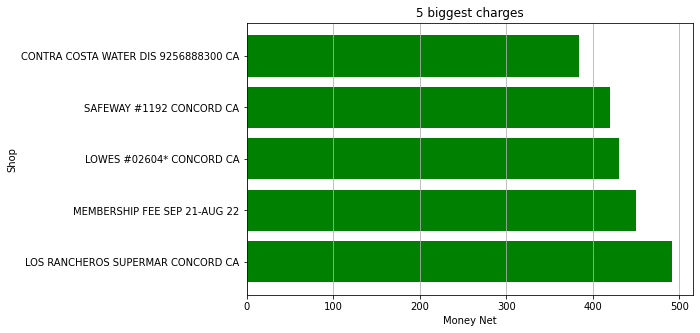

In [75]:
import matplotlib.pyplot as plt

stores_grouped = stores.groupby(['Description']).sum()
stores_grouped['Total'] = 0
stores_grouped['Net'] = stores_grouped['Debit'] + stores_grouped['Credit']

stores_grouped2 = stores.groupby(['Description']).Description.count()


for ind in stores_grouped.index:
    stores_grouped['Total'][ind] = stores_grouped2[ind]

stores_grouped = stores_grouped.sort_values(by='Net', ascending=False).reset_index()

to_plot = stores_grouped.head(5)

x_axis = to_plot['Description']
y_axis = to_plot['Net']

plt.figure(figsize=(8,5), frameon=True)
plt.grid(axis='x') 
plt.barh(x_axis,y_axis, color='green')
plt.title('5 biggest charges')
plt.ylabel('Shop')
plt.xlabel('Money Net')





